In [1]:
import pandas as pd
import numpy as np

In [259]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [11]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace  =True)

In [12]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
df.shape

(5572, 2)

In [15]:
#Data Cleaning
#EDA
#Text Preprocessing
#model Building
#Evaluation
#Improvements
#Website
#Deploy

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [17]:
df.sample(5)

,v1,v2
1381,ham,We spend our days waiting for the ideal path t...
4517,ham,That sucks. So what do you got planned for you...
1202,ham,"Me also da, i feel yesterday night wait til 2..."
61,ham,Ha ha ha good joke. Girls are situation seekers.
3407,spam,Do you want a New Nokia 3510i colour phone Del...


In [18]:
# Renaming Columns
df.rename(columns = {'v1':'target','v2':'text'},inplace =True)

In [19]:
df.sample(5)

,target,text
5200,spam,Call Germany for only 1 pence per minute! Call...
1775,ham,Did u see what I posted on your Facebook?
4997,ham,Can you talk with me..
2561,ham,And maybe some pressies
2390,ham,First has she gained more than &lt;#&gt; kg s...


In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [22]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [25]:
#check for duplicates values
df.duplicated().sum()

403

In [26]:
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

In [27]:
#EDA

In [28]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

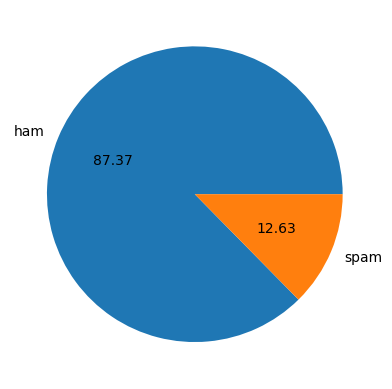

In [34]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['ham','spam'], autopct ='%0.2f')
plt.show()

In [35]:
# Data is imbalanced

In [36]:
import nltk

In [37]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91858\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
df['num_characters'] = df['text'].apply(len)
df.head()

C:\Users\91858\AppData\Local\Temp\ipykernel_18340\83982535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [41]:
# num of words
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [44]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

C:\Users\91858\AppData\Local\Temp\ipykernel_18340\1296417905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [45]:
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

C:\Users\91858\AppData\Local\Temp\ipykernel_18340\4019548161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [46]:
df.describe()

,target,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [50]:
#ham
df[df['target']==0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [51]:
#spam
df[df['target']==1][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [52]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

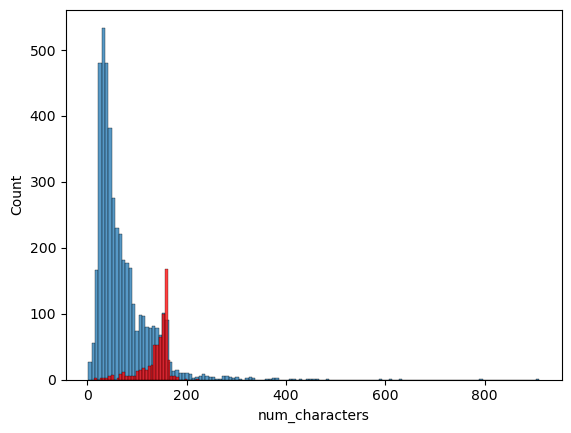

In [53]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

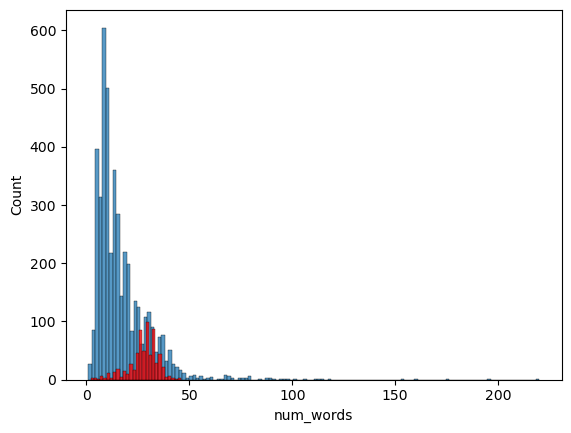

In [54]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color = 'red')

C:\Users\91858\AppData\Local\Temp\ipykernel_18340\1305659618.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot= True)


<Axes: >

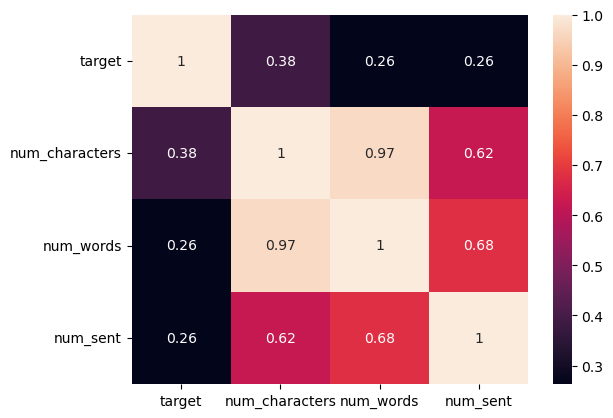

In [57]:
sns.heatmap(df.corr(),annot= True)

#Data Preprocessing

In [69]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [58]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [64]:
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [70]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\91858\AppData\Local\Temp\ipykernel_18340\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [71]:
df.head()

,target,text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [79]:
#word cloud
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color ='white')

In [80]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

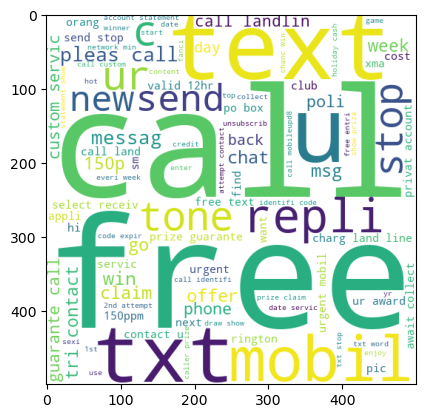

In [81]:
plt.imshow(spam_wc)

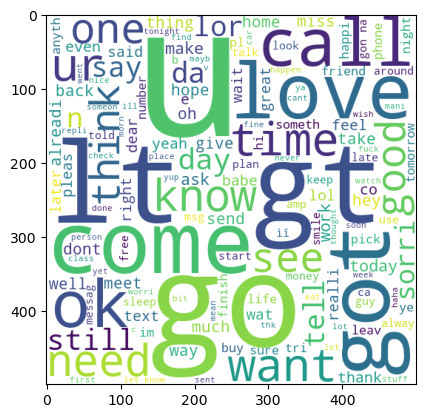

In [83]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

#Top 30 words

In [84]:
df.head()

,target,text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [87]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [88]:
len(spam_corpus)

9939

In [89]:
from collections import Counter

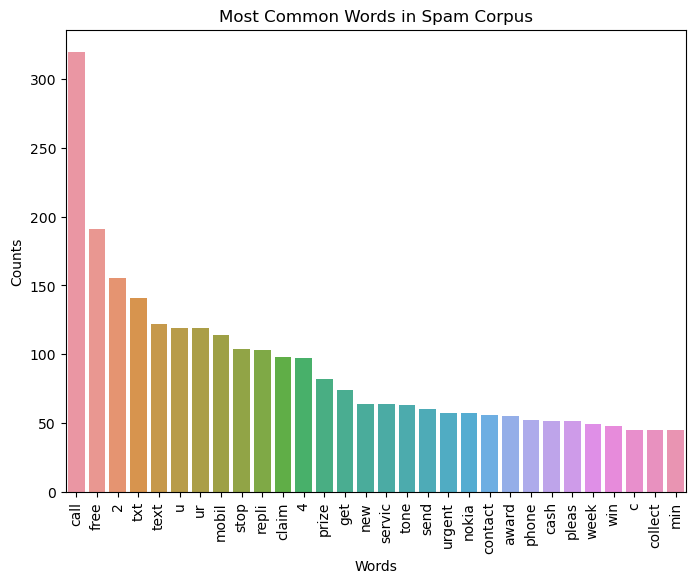

In [133]:
df_count = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

# Create a barplot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=df_count, x='Word', y='Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Most Common Words in Spam Corpus')
plt.show()


In [135]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

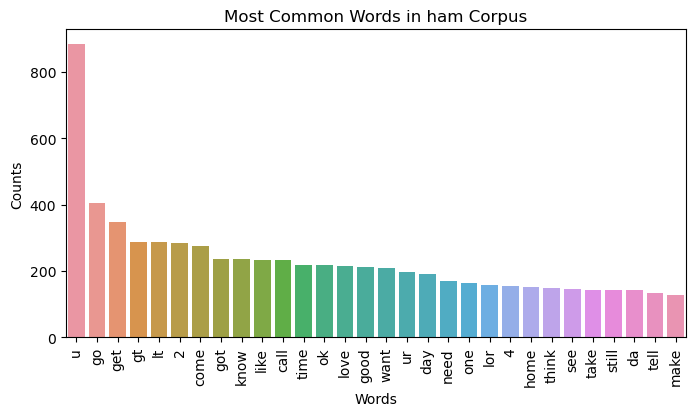

In [137]:
df_count_ham = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])

# Create a barplot using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(data=df_count_ham, x='Word', y='Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Most Common Words in ham Corpus')
plt.show()

MODEL BUILDING

In [138]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()

In [141]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [143]:
X.shape

(5169, 6708)

In [148]:
y = df['target'].values

In [149]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state =2)


In [155]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [153]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [154]:
gnb.fit(X_train,y_train)

GaussianNB()

In [157]:
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [158]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [159]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [165]:
# Lets use Tfidf

In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [167]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [168]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state =2)

In [169]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [170]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [171]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [172]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [173]:
#choosed tfidf mnb

In [175]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.5/99.7 MB 16.5 MB/s eta 0:00:07
   ---------------------------------------- 1.2/99.7 MB 24.6 MB/s eta 0:00:05
    --------------------------------------- 1.9/99.7 MB 17.2 MB/s eta 0:00:06
    --------------------------------------- 2.2/99.7 MB 12.8 MB/s eta 0:00:08
   - -------------------------------------- 2.6/99.7 MB 10.9 MB/s eta 0:00:09
   - -------------------------------------- 2.8/99.7 MB 9.8 MB/s eta 0:00:10
   - -------------------------------------- 2.9/99.7 MB 9.7 MB/s eta 0:00:11
   - -------------------------------------- 2.9/99.7 MB 9.7 MB/s eta 0:00:11
   - -------------------------------------- 2.9/99.7 MB 9.7 MB/s eta 0:00:11
   - ----------------------

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [177]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [181]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [179]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [180]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [192]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print('For ',name)
    print('Accuracy - ',current_accuracy)
    print('Precision- ',current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    


For  SVC
Accuracy -  0.9729206963249516
Precision-  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision-  1.0
For  NB
Accuracy -  0.9593810444874274
Precision-  1.0
For  DT
Accuracy -  0.937137330754352
Precision-  0.8543689320388349
For  LR
Accuracy -  0.9516441005802708
Precision-  0.94
For  RF
Accuracy -  0.971953578336557
Precision-  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision-  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision-  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision-  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision-  0.9238095238095239
For  xgb
Accuracy -  0.9729206963249516
Precision-  0.9435483870967742


In [195]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [196]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [197]:
#Model Improvement

In [199]:
#changing the max_feature in tfidf
tfidf_1 = TfidfVectorizer(max_features =3000)

In [231]:
X1 = tfidf_1.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [201]:
X1_train,X1_test,y_train,y_test = train_test_split(X1,y,test_size =0.2,random_state =2)

In [202]:
def train_classifier(clf,X1_train,y_train,X1_test,y_test):
    clf.fit(X1_train,y_train)
    y_pred = clf.predict(X1_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [204]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X1_train,y_train,X1_test,y_test)
    
    print('For ',name)
    print('Max_features_Accuracy - ',current_accuracy)
    print('Max_features_Precision- ',current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Max_features_Accuracy -  0.9758220502901354
Max_features_Precision-  0.9747899159663865
For  KN
Max_features_Accuracy -  0.9052224371373307
Max_features_Precision-  1.0
For  NB
Max_features_Accuracy -  0.9709864603481625
Max_features_Precision-  1.0
For  DT
Max_features_Accuracy -  0.9294003868471954
Max_features_Precision-  0.8282828282828283
For  LR
Max_features_Accuracy -  0.9584139264990329
Max_features_Precision-  0.9702970297029703
For  RF
Max_features_Accuracy -  0.9758220502901354
Max_features_Precision-  0.9829059829059829
For  AdaBoost
Max_features_Accuracy -  0.960348162475822
Max_features_Precision-  0.9292035398230089
For  BgC
Max_features_Accuracy -  0.9584139264990329
Max_features_Precision-  0.8682170542635659
For  ETC
Max_features_Accuracy -  0.9748549323017408
Max_features_Precision-  0.9745762711864406
For  GBDT
Max_features_Accuracy -  0.9468085106382979
Max_features_Precision-  0.9191919191919192
For  xgb
Max_features_Accuracy -  0.9671179883945842
Max_fea

In [206]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Max_ft_3000_Accuracy':accuracy_scores,'Max_ft_30000_Precision':precision_scores}).sort_values('Max_ft_30000_Precision',ascending=False)

In [212]:
new_data = performance_df.merge(temp_df, on='Algorithm')
new_data

,Algorithm,Accuracy,Precision,Max_ft_3000_Accuracy,Max_ft_30000_Precision
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,xgb,0.972921,0.943548,0.967118,0.926230
7,LR,0.951644,0.940000,0.958414,0.970297
8,GBDT,0.952611,0.923810,0.946809,0.919192
9,BgC,0.958414,0.862595,0.958414,0.868217


In [208]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X2 = scaler.fit_transform(X1)

In [209]:
X2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [210]:
X2_train,X2_test,y_train,y_test = train_test_split(X2,y,test_size =0.2,random_state =2)

In [213]:
def train_classifier(clf,X2_train,y_train,X2_test,y_test):
    clf.fit(X2_train,y_train)
    y_pred = clf.predict(X2_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [214]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X2_train,y_train,X2_test,y_test)
    
    print('For ',name)
    print('Scaled_Accuracy - ',current_accuracy)
    print('Scaled_Precision- ',current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Scaled_Accuracy -  0.9690522243713733
Scaled_Precision-  0.9274193548387096
For  KN
Scaled_Accuracy -  0.9052224371373307
Scaled_Precision-  0.9761904761904762
For  NB
Scaled_Accuracy -  0.9787234042553191
Scaled_Precision-  0.9461538461538461
For  DT
Scaled_Accuracy -  0.9274661508704062
Scaled_Precision-  0.8118811881188119
For  LR
Scaled_Accuracy -  0.9671179883945842
Scaled_Precision-  0.9642857142857143
For  RF
Scaled_Accuracy -  0.9758220502901354
Scaled_Precision-  0.9829059829059829
For  AdaBoost
Scaled_Accuracy -  0.960348162475822
Scaled_Precision-  0.9292035398230089
For  BgC
Scaled_Accuracy -  0.9584139264990329
Scaled_Precision-  0.8682170542635659
For  ETC
Scaled_Accuracy -  0.9748549323017408
Scaled_Precision-  0.9745762711864406
For  GBDT
Scaled_Accuracy -  0.9468085106382979
Scaled_Precision-  0.9191919191919192
For  xgb
Scaled_Accuracy -  0.9671179883945842
Scaled_Precision-  0.9262295081967213


In [215]:
temp_df_scaled = pd.DataFrame({'Algorithm':clfs.keys(),'Scaled_Accuracy':accuracy_scores,'Scaled_Precision':precision_scores}).sort_values('Scaled_Precision',ascending=False)

In [216]:
new_data_scaled = new_data.merge(temp_df_scaled, on ='Algorithm')

In [217]:
new_data_scaled

,Algorithm,Accuracy,Precision,Max_ft_3000_Accuracy,Max_ft_30000_Precision,Scaled_Accuracy,Scaled_Precision
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
1,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
2,RF,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204
6,xgb,0.972921,0.943548,0.967118,0.926230,0.967118,0.926230
7,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286
8,GBDT,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217


# Scaling doesn't provides any benefit

In [218]:
#lets try out voting classifier, if its gonna increase the performance

In [219]:
from sklearn.ensemble import VotingClassifier

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)



In [220]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [221]:
voting.fit(X1_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [223]:
y_pred = voting.predict(X1_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


#No benefit

Lets use stacking

In [224]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [225]:
from sklearn.ensemble import StackingClassifier

In [226]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [227]:
clf.fit(X1_train,y_train)
y_pred = clf.predict(X1_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


#No benefit from stacking also

In [250]:
tfidf_1 = TfidfVectorizer(max_features =3000)

In [251]:
X1 = tfidf_1.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [252]:
X1_train,X1_test,y_train,y_test = train_test_split(X1,y,test_size =0.2,random_state =2)

In [253]:
X1.shape

(5169, 3000)

In [254]:
mnb = MultinomialNB()
mnb.fit(X1_train,y_train)
y_pred2 = mnb.predict(X1_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [255]:
import pickle
pickle.dump(tfidf_1, open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))